### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True

### Read train and test data

In [2]:
# read train csv file to df_train dataframe
df_train = pd.read_csv('titanic_train.csv')
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# read test csv file to df_test dataframe
df_test = pd.read_csv('titanic_test.csv')
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis 

Text(0.5,1,'Survivors by sex')

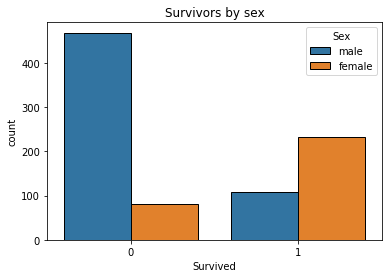

In [4]:
# plot number of survivors by sex from df_train, 0 = died, 1 = survived
sns.countplot(x='Survived', data=df_train, hue='Sex')
plt.title('Survivors by sex')

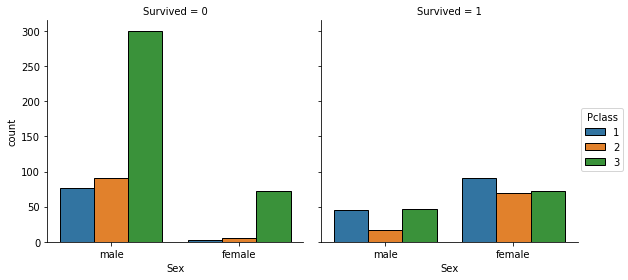

In [5]:
# plot number of survivors by pclass from df_train
sns.factorplot(x='Sex', data=df_train, hue='Pclass', col='Survived', kind='count')


C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Age distribution')

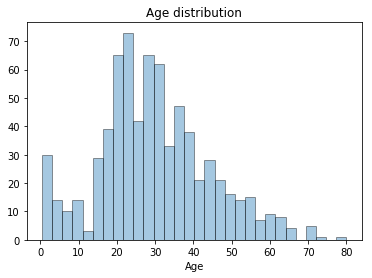

In [6]:
# plot age distribution from df_train
sns.distplot(df_train['Age'].dropna(), bins=30, kde=False)
plt.title('Age distribution')

### Fill in NaN values

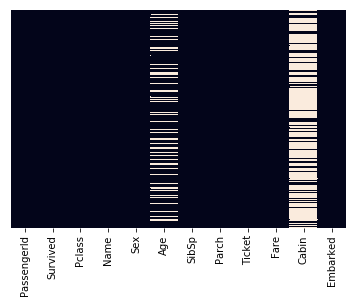

In [7]:
# plot NaN values from df_train
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

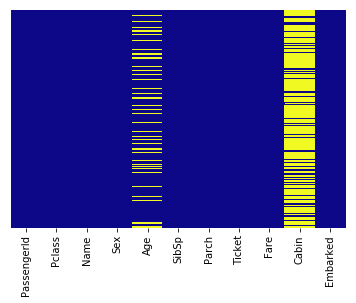

In [8]:
# plot NaN values from df_test
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='plasma')

Text(0.5,1,'Plcass by age')

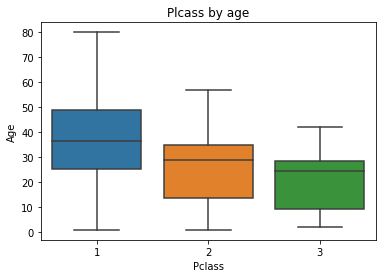

In [9]:
# plot pclass by age from df_train, not including NaN values
sns.boxplot(x='Pclass', y='Age', data=df_train.dropna())
plt.title('Plcass by age')

Text(0.5,1,'Pclass by age')

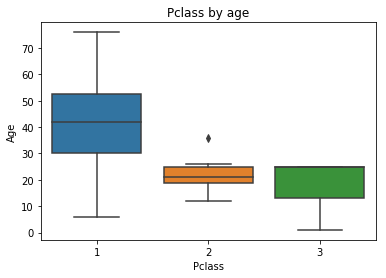

In [10]:
# plot pclass by age from df_test, not including NaN values
sns.boxplot(x='Pclass', y='Age', data=df_test.dropna())
plt.title('Pclass by age')

In [11]:
# grouping by pclass to find average age of each pclass
avg_age_train = df_train.groupby('Pclass')['Age'].mean().round()
avg_age_test = df_test.groupby('Pclass')['Age'].mean().round()

# function to fill NaN values in age column for df_train
def age_fill_train(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return avg_age_train.iloc[0]
        elif Pclass == 2:
            return avg_age_train.iloc[1]
        else:
            return avg_age_train.iloc[2]
    else:
        return Age
    
# function to fill NaN values in age column for df_test
def age_fill_test(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return avg_age_test.iloc[0]
        elif Pclass == 2:
            return avg_age_test.iloc[1]
        else:
            return avg_age_test.iloc[2]
    else:
        return Age


In [12]:
# apply function to fill NaN values in age column
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_fill_train, axis = 1)
df_test['Age'] = df_test[['Age', 'Pclass']].apply(age_fill_test, axis = 1)

# fill NaN values for fare with average
fare_3 = df_test.groupby('Pclass')['Fare'].mean()
print(fare_3.head())
df_test['Fare'] = df_test['Fare'].fillna('12.4696')

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


Text(0.5,1,'heatmap of NaN values in df_train')

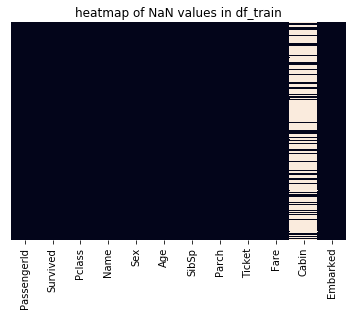

In [13]:
# plot updated NaN values from df_train
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)
plt.title('heatmap of NaN values in df_train')

Text(0.5,1,'heatmap of NaN values in df_test')

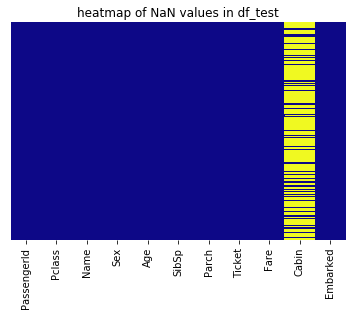

In [14]:
# plot updated NaN values from df_test
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.title('heatmap of NaN values in df_test')

### Drop unnecessary columns & convert categorical values to numerical values

In [15]:
# drop cabin column
df_train.drop('Cabin', axis = 1, inplace=True)
df_test.drop('Cabin', axis = 1, inplace=True)

In [16]:
# convert sex and embarked categorical values to numerical values from df_train
sex_train = pd.get_dummies(df_train['Sex'], drop_first=True)
embark_train = pd.get_dummies(df_train['Embarked'], drop_first=True)

# convert sex and embarked categorical values to numerical values from df_test
sex_test = pd.get_dummies(df_test['Sex'], drop_first=True)
embark_test = pd.get_dummies(df_test['Embarked'], drop_first=True)

# concat numerical values to dataset
df_train = pd.concat([df_train, sex_train, embark_train], axis =1)
df_test = pd.concat([df_test, sex_test, embark_test], axis =1) 

In [17]:
# drop categorical columns from dataset
df_train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
df_test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [18]:
# verify df_train 
df_train.info()
df_train.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
# verify df_test
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null object
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(1), int64(4), object(1), uint8(3)
memory usage: 20.9+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [20]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S


### Model and prediction

In [21]:
# assign df_train and df_test to set variables
X_train = df_train.drop('Survived', axis=1)
X_test = df_test.copy()
y_train = df_train['Survived']

# verify shape 
X_train.shape, X_test.shape, y_train.shape

((891, 9), (418, 9), (891,))

In [22]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

# fit model to training data
logreg_model.fit(X_train, y_train)

# predict on test data
logreg_prediction = logreg_model.predict(X_test)

# score on model for test data prediction confidence
logreg_score = logreg_model.score(X_train, y_train)*100
print('%.2f%%' % logreg_score, 'score for Logistic Regression model')

80.70% score for Logistic Regression model


In [23]:
# Support Vector Machine model
from sklearn.svm import SVC
svc_model = SVC()

# fit model to training data
svc_model.fit(X_train, y_train)

# predict on test data
svc_prediction = svc_model.predict(X_test)

# score on model for test data prediction confidence
svc_score = svc_model.score(X_train, y_train)*100
print('%.2f%%' % svc_score, ' score for Support Vector Machine model')


99.55%  score for Support Vector Machine model


In [24]:
# KNeighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors = 3)

# fit model to training data
knc_model.fit(X_train, y_train)

# predict on test data
knc_prediction = knc_model.predict(X_test)

# score on model for test data prediction confidence
knc_score = knc_model.score(X_train, y_train)*100
print('%.2f%%' % knc_score,'score for KNeighbors Classifier model')

80.81% score for KNeighbors Classifier model


In [25]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

# fit model to training data
dtc_model.fit(X_train, y_train)

# predict on test data
dtc_prediction = dtc_model.predict(X_test)

# score on model for test data prediction confidence
dtc_score = dtc_model.score(X_train, y_train)*100
print('%.2f%%' % dtc_score, 'score for Decision Tree Classifier model')

100.00% score for Decision Tree Classifier model


In [26]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators = 100)

# fit model to training data
rfc_model.fit(X_train, y_train)

# predict on test data
rfc_prediction = rfc_model.predict(X_test)

# score on model for test data prediction confidence
rfc_score = rfc_model.score(X_train, y_train)*100
print('%.2f%%' % rfc_score, 'score for Random Forest Classifier model')


100.00% score for Random Forest Classifier model


### Choosing best model and submission

In [27]:
# dataframe of best model to predict survival
models =pd.DataFrame({'models': ['Logisitc Regression', 'Support Vector Machine', 'KNeighbors Classifier',
                                 'Decision Tree Classifier', 'Random Forest Classifier'],
                      'score': [logreg_score, svc_score, knc_score, dtc_score, rfc_score]})

models.sort_values(by='score', ascending=False)

,models,score
3,Decision Tree Classifier,100.000000
4,Random Forest Classifier,100.000000
1,Support Vector Machine,99.551066
2,KNeighbors Classifier,80.808081
0,Logisitc Regression,80.695847


In [28]:
#save prediction
submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': dtc_prediction})
submit.to_csv('submit_titanic_01.csv', index=False)
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
